In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
# sbert.net 
model


In [4]:
sentences = [
    "Price is what you pay. Value is what you get.",
    "Honesty is a very expensive gift, Don't expect it from cheap people.",
    "There comes a time when you ought to start doing what you want. Take a job that you love. You will jump out of bed in the morning.",
    "It takes 20 years to build a reputation and five minutes to ruin it. If you think about that, you'll do things differently.",
    "You only have to do a very few things right in your life so long as you don't do too many things.",
    "You never know who's swimming naked until the tide goes out.",
    "You can't produce a baby in one month by getting nine women pregnant.",
    "In the world of business, the people who are most successful are those who are doing what they love.",
    "Never ask a barber if you need a haircut.",
    "When you combine ignorance and leverage, you get some pretty interesting results."
]
embeddings = model.encode(sentences)
embeddings 

array([[-0.17411922,  0.05200536,  0.8602543 , ...,  0.10604334,
        -0.32130316,  0.42709592],
       [-0.05262527,  0.1983022 , -0.4155563 , ..., -0.22768065,
        -0.32723123,  0.06431012],
       [ 0.01768001,  0.12905237,  2.5319223 , ..., -0.5109897 ,
        -0.25546885, -0.11713743],
       ...,
       [-0.16245681,  0.9311248 ,  1.2201738 , ..., -1.0171412 ,
        -0.81819004, -0.47247952],
       [ 0.78961176,  0.8613778 ,  1.0702895 , ...,  0.1108081 ,
        -0.7566891 , -0.42008635],
       [-0.51619184, -0.14368103,  0.91835594, ..., -0.40137762,
        -0.46047395, -0.1052517 ]], dtype=float32)

In [5]:
embeddings.shape

(10, 768)

In [8]:
# semantic textual similarity (STS)
# semantic search, information retrieval from semantic meaning
# search on concept rather on key words
# top modeling can use this method also

In [9]:
# let's do cosine similarity
import numpy as np 
from sentence_transformers.util import cos_sim 

sim = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    # own sentence to rest all sentences
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])
    
sim

array([[ 1.00000012,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.51033962,  0.99999982,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.29821485,  0.36398274,  0.99999988,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.22063732,  0.41021696,  0.3855266 ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.28621647,  0.51332438,  0.33368617,  0.29048616,  0.99999988,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.13042609,  0.30137753,  0.33863205,  0.46693951,  0.40665787,
         0.99999976,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.06305228,  0.35774735,  0.40331653,  0.55925399,  0.38618416,
         0.51865315,  0.99999988,  0.        

<Axes: >

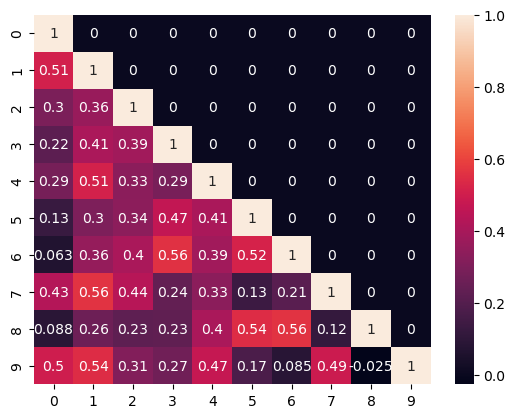

In [10]:
# draw heatmap
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(sim, annot=True)

In [11]:
sentences

['Price is what you pay. Value is what you get.',
 "Honesty is a very expensive gift, Don't expect it from cheap people.",
 'There comes a time when you ought to start doing what you want. Take a job that you love. You will jump out of bed in the morning.',
 "It takes 20 years to build a reputation and five minutes to ruin it. If you think about that, you'll do things differently.",
 "You only have to do a very few things right in your life so long as you don't do too many things.",
 "You never know who's swimming naked until the tide goes out.",
 "You can't produce a baby in one month by getting nine women pregnant.",
 'In the world of business, the people who are most successful are those who are doing what they love.',
 'Never ask a barber if you need a haircut.',
 'When you combine ignorance and leverage, you get some pretty interesting results.']

In [ ]:
# use different model 
model = SentenceTransformer('all-mpnet-base-v2')
model

<Axes: >

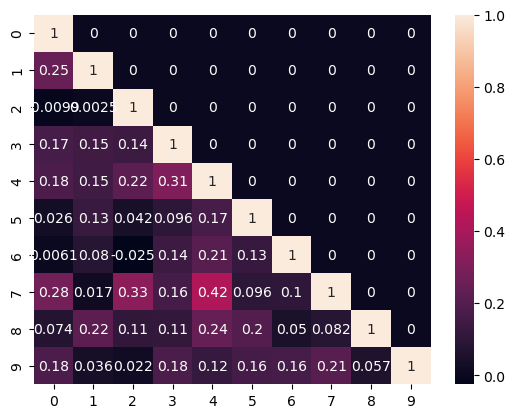

In [14]:
# let's do cosine similarity
embeddings = model.encode(sentences)

sim = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    # own sentence to rest all sentences
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])
    
sns.heatmap(sim, annot=True)